In [1]:
# importing necessary libraries and configurations
import pandas as pd
import matplotlib.pyplot as plt
from fbprophet import Prophet
from fbprophet.plot import plot_plotly

plt.style.use("seaborn")
%matplotlib inline

In [2]:
# loading the data set
df = pd.read_csv("df_45.csv")

In [3]:
# data cleaning and indexing 
df.drop("zip_code", axis=1, inplace=True)

df.occurred_date_time = df.occurred_date_time.astype("datetime64")
df.set_index(["occurred_date_time"], inplace=True)
df.sort_index(inplace=True)

# examining the new data frame
display(df.head())
display(df.tail())

highest_offense_description     report_date_time  \
occurred_date_time                                                         
2003-01-01 00:00:00                  IDENTITY THEFT  2013-03-11 17:28:00   
2003-01-01 00:00:00                  IDENTITY THEFT  2008-05-10 18:36:00   
2003-01-01 00:00:00  INDECENCY WITH A CHILD/CONTACT  2017-10-02 21:14:00   
2003-01-01 00:01:00  FAILURE TO REG AS SEX OFFENDER  2003-02-03 11:39:00   
2003-01-01 00:02:00          BURGLARY NON RESIDENCE  2003-01-01 00:02:00   

                                    location_type  \
occurred_date_time                                  
2003-01-01 00:00:00              RESIDENCE / HOME   
2003-01-01 00:00:00              RESIDENCE / HOME   
2003-01-01 00:00:00              RESIDENCE / HOME   
2003-01-01 00:01:00              RESIDENCE / HOME   
2003-01-01 00:02:00  COMMERCIAL / OFFICE BUILDING   

                                              address  council_district  \
occurred_date_time                                                        
2003-01-01 00:00:00               7001 S CONGRESS AVE               2.0   
2003-01-01 00:00:00           7312 WHISPERING OAKS DR               5.0   
2003-01-01 00:00:00  1200 BLOCK AUSTIN HIGHLANDS BLVD               2.0   
2003-01-01 00:01:00       6800 BLOCK S I 35 SB SVC RD               2.0   
2003-01-01 00:02:00                 730 W STASSNEY LN               2.0   

                    apd_sector  apd_district clearance_status  \
occurred_date_time                                              
2003-01-01 00:00:00         FR             3                N   
2003-01-01 00:00:00         FR             1              NaN   
2003-01-01 00:00:00         FR             4                N   
2003-01-01 00:01:00         FR             6                C   
2003-01-01 00:02:00         DA             3              NaN   

                          clearance_date   latitude  longitude  year  month  \
occurred_date_time                                                            
2003-01-01 00:00:00  2013-03-12 00:00:00  30.188878 -97.780075  2003      1   
2003-01-01 00:00:00  2008-05-13 00:00:00  30.202175 -97.817542  2003      1   
2003-01-01 00:00:00  2018-08-02 00:00:00        NaN        NaN  2003      1   
2003-01-01 00:01:00  2003-02-05 00:00:00        NaN        NaN  2003      1   
2003-01-01 00:02:00  2003-10-18 00:00:00  30.209853 -97.782088  2003      1   

                     week  day  hour  
occurred_date_time                    
2003-01-01 00:00:00     1    1     0  
2003-01-01 00:00:00     1    1     0  
2003-01-01 00:00:00     1    1     0  
2003-01-01 00:01:00     1    1     0  
2003-01-01 00:02:00     1    1     0

highest_offense_description     report_date_time  \
occurred_date_time                                                     
2020-12-04 21:00:00     POSSESSION OF MARIJUANA  2020-12-04 21:00:00   
2020-12-04 22:35:00          DATING DISTURBANCE  2020-12-04 22:35:00   
2020-12-04 22:50:00                       THEFT  2020-12-05 11:02:00   
2020-12-05 03:00:00                  AUTO THEFT  2020-12-05 10:09:00   
2020-12-05 17:40:00          DATING DISTURBANCE  2020-12-05 17:40:00   

                                    location_type                   address  \
occurred_date_time                                                            
2020-12-04 21:00:00  STREETS / HWY / ROAD / ALLEY        1500 W STASSNEY LN   
2020-12-04 22:35:00              RESIDENCE / HOME        5504 ROSE HILL CIR   
2020-12-04 22:50:00               OTHER / UNKNOWN   739 W WILLIAM CANNON DR   
2020-12-05 03:00:00         PARKING LOTS / GARAGE       401 LITTLE TEXAS LN   
2020-12-05 17:40:00              RESIDENCE / HOME  3014 W WILLIAM CANNON DR   

                     council_district apd_sector  apd_district  \
occurred_date_time                                               
2020-12-04 21:00:00               2.0         DA             3   
2020-12-04 22:35:00               5.0         DA             3   
2020-12-04 22:50:00               2.0         FR             3   
2020-12-05 03:00:00               2.0         FR             4   
2020-12-05 17:40:00               5.0         DA             4   

                    clearance_status       clearance_date   latitude  \
occurred_date_time                                                     
2020-12-04 21:00:00                C  2020-12-04 00:00:00  30.213245   
2020-12-04 22:35:00              NaN                  NaN  30.214449   
2020-12-04 22:50:00              NaN                  NaN  30.197409   
2020-12-05 03:00:00              NaN                  NaN  30.200675   
2020-12-05 17:40:00              NaN                  NaN  30.210709   

                     longitude  year  month  week  day  hour  
occurred_date_time                                            
2020-12-04 21:00:00 -97.792104  2020     12    49    4    21  
2020-12-04 22:35:00 -97.794137  2020     12    49    4    22  
2020-12-04 22:50:00 -97.789895  2020     12    49    4    22  
2020-12-05 03:00:00 -97.772540  2020     12    49    5     3  
2020-12-05 17:40:00 -97.821468  2020     12    49    5    17

In [4]:
# Creating violent crime and murder data frames for analysis
df_viol = df.query(
    'highest_offense_description == ["AGG ASSAULT", "AGG ROBBERY/DEADLY WEAPON", "CAPITAL MURDER", "MURDER", "RAPE"]'
)
df_viol_mur = df.query('highest_offense_description == ["MURDER", "CAPITAL MURDER"]')


# Annual overall crime (2017-present)
df_17 = df[df.year == 2017]
df_18 = df[df.year == 2018]
df_19 = df[df.year == 2019]
df_20 = df[df.year == 2020]

# Annual violent crime (2017-present)
df_viol_17 = df_viol[df_viol.year == 2017]
df_viol_18 = df_viol[df_viol.year == 2018]
df_viol_19 = df_viol[df_viol.year == 2019]
df_viol_20 = df_viol[df_viol.year == 2020]

# Annual murders (2017-present)
df_viol_mur_17 = df_viol_mur[df_viol_mur.year == 2017]
df_viol_mur_18 = df_viol_mur[df_viol_mur.year == 2018]
df_viol_mur_19 = df_viol_mur[df_viol_mur.year == 2019]
df_viol_mur_20 = df_viol_mur[df_viol_mur.year == 2020]

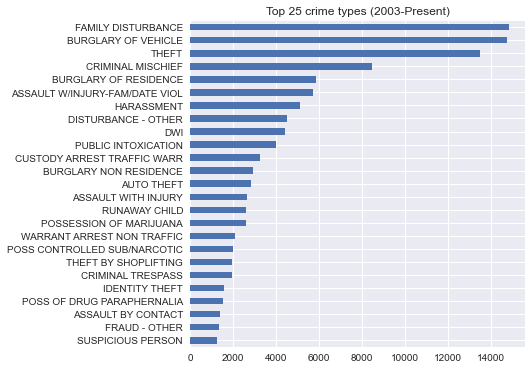

----------------------------------------------------------
----------------------------------------------------------


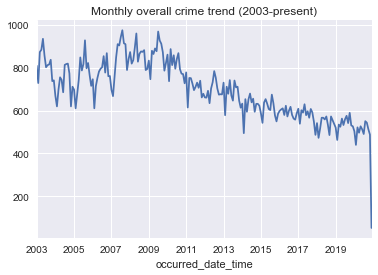

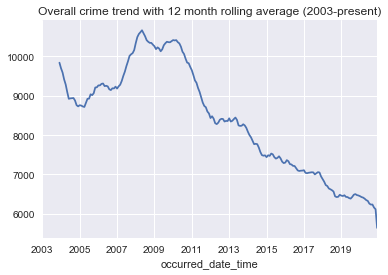

----------------------------------------------------------
----------------------------------------------------------


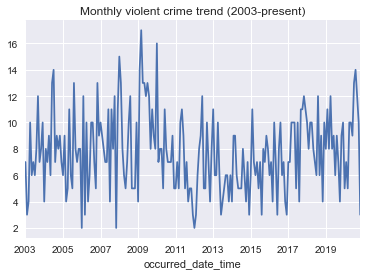

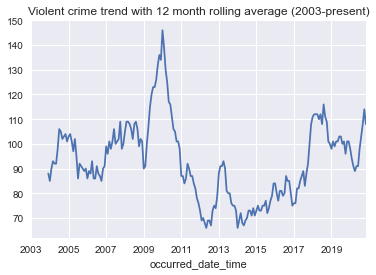

In [5]:
# Top 25 crime types
df.highest_offense_description.value_counts().head(25).sort_values().plot.barh(
    figsize=(6, 6), title="Top 25 crime types (2003-Present)"
)
plt.show()

print("----------------------------------------------------------")
print("----------------------------------------------------------")

df.resample("M").size().plot(
    title="Monthly overall crime trend (2003-present)",  # figsize=(8, 5)
)
plt.show()

# Violent crime trend with a year rolling average
df.resample("M").size().rolling(12).sum().plot(
    title="Overall crime trend with 12 month rolling average (2003-present)",
    # figsize=(8, 5),
)
plt.show()

print("----------------------------------------------------------")
print("----------------------------------------------------------")

# Plotting violent crime trend on a monthly basis
df_viol.resample("M").size().plot(
    title="Monthly violent crime trend (2003-present)",  # figsize=(8, 5)
)
plt.show()

# Violent crime trend with a year rolling average
df_viol.resample("M").size().rolling(12).sum().plot(
    title="Violent crime trend with 12 month rolling average (2003-present)",
    # figsize=(8, 5),
)
plt.show()

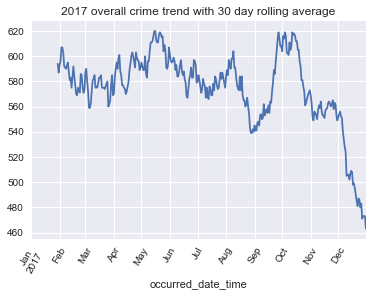

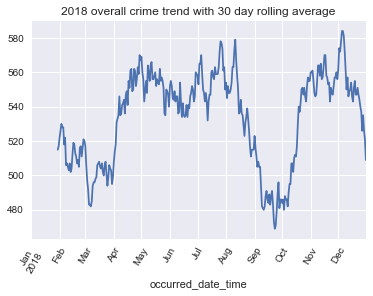

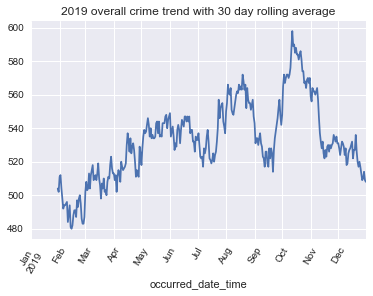

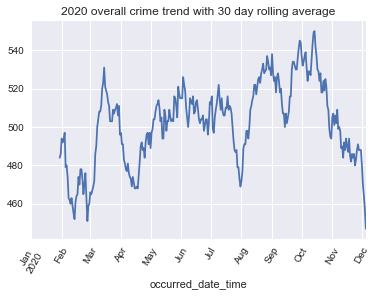

In [6]:
df_17.resample("D").size().rolling(30).sum().plot(
    # fontsize=12,
    # figsize=(8, 5),
    rot=60,
    title="2017 overall crime trend with 30 day rolling average",
)
plt.show()

print("==============================================================================")
print("==============================================================================")

df_18.resample("D").size().rolling(30).sum().plot(
    # fontsize=12,
    # figsize=(8, 5),
    rot=60,
    title="2018 overall crime trend with 30 day rolling average",
)
plt.show()

print("==============================================================================")
print("==============================================================================")

df_19.resample("D").size().rolling(30).sum().plot(
    # fontsize=12,
    # figsize=(8, 5),
    rot=60,
    title="2019 overall crime trend with 30 day rolling average",
)
plt.show()

print("==============================================================================")
print("==============================================================================")

df_20.resample("D").size().rolling(30).sum().plot(
    # fontsize=12,
    # figsize=(8, 5),
    rot=60,
    title="2020 overall crime trend with 30 day rolling average",
)
plt.show()

# ax = df_20.plot(x="year", figsize=(10, 6), label="overall crime")
# df_viol_20.plot(x="year", label="violent crime", ax=ax, rot=60)
# plt.show()

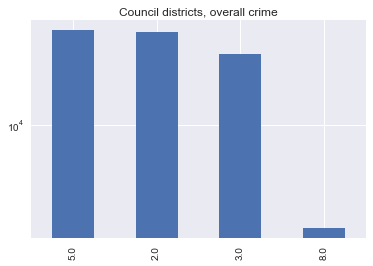

----------------------------------------------------------


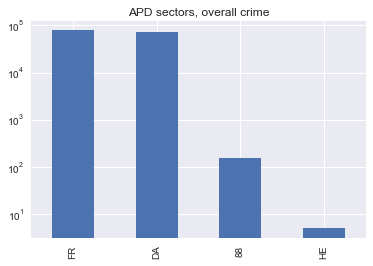

----------------------------------------------------------


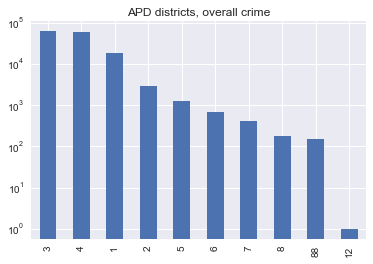

In [7]:
# Showing overall crime rates by council districts, APD districts, and sectors
df.council_district.value_counts().plot.bar(
    title="Council districts, overall crime", logy=True
)
plt.show()

print("----------------------------------------------------------")

df.apd_sector.value_counts().plot.bar(title="APD sectors, overall crime", logy=True)
plt.show()

print("----------------------------------------------------------")

df.apd_district.value_counts().plot.bar(title="APD districts, overall crime", logy=True)
plt.show()

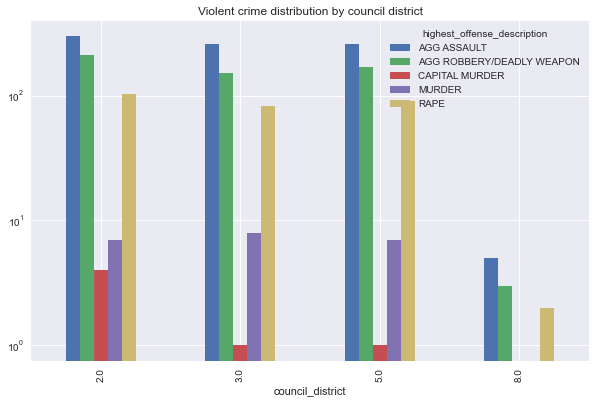

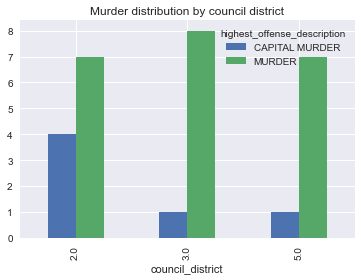

----------------------------------------------------------
----------------------------------------------------------


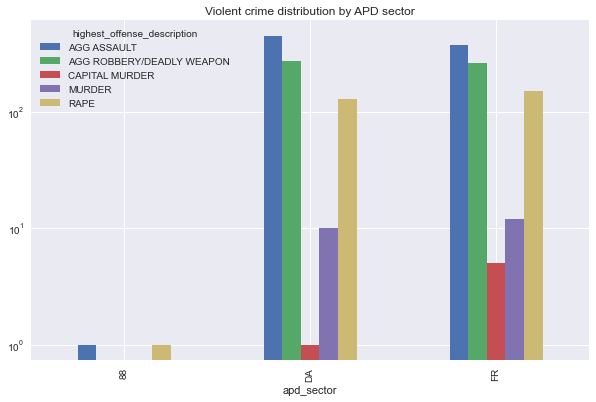

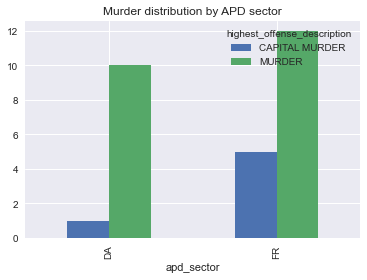

----------------------------------------------------------
----------------------------------------------------------


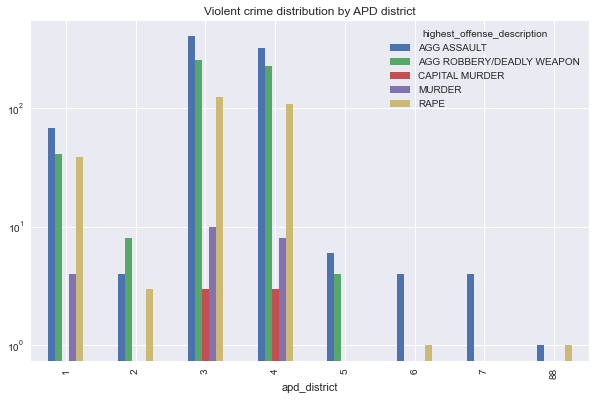

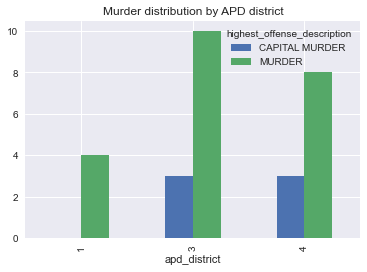

In [8]:
# Showing violent crime and murder rates by council districts, APD districts, and sectors
pd.crosstab(df_viol.council_district, df_viol.highest_offense_description).plot.bar(
    figsize=(10, 6.25),
    logy=True,
    title="Violent crime distribution by council district",
)
plt.show()

pd.crosstab(
    df_viol_mur.council_district, df_viol_mur.highest_offense_description
).plot.bar(title="Murder distribution by council district")
plt.show()

print("----------------------------------------------------------")
print("----------------------------------------------------------")

pd.crosstab(df_viol.apd_sector, df_viol.highest_offense_description).plot.bar(
    figsize=(10, 6.25), logy=True, title="Violent crime distribution by APD sector"
)
plt.show()

pd.crosstab(df_viol_mur.apd_sector, df_viol_mur.highest_offense_description).plot.bar(
    title="Murder distribution by APD sector"
)
plt.show()

print("----------------------------------------------------------")
print("----------------------------------------------------------")

pd.crosstab(df_viol.apd_district, df_viol.highest_offense_description).plot.bar(
    figsize=(10, 6.25), logy=True, title="Violent crime distribution by APD district"
)
plt.show()

pd.crosstab(df_viol_mur.apd_district, df_viol_mur.highest_offense_description).plot.bar(
    title="Murder distribution by APD district"
)
plt.show()

highest_offense_description                     AGG ASSAULT  \
location_type                                                 
ATM SEPARATE FROM BANK                                    0   
AUTO DEALERSHIP NEW / USED                                2   
BANKS / SAVINGS & LOAN                                    0   
BAR / NIGHT CLUB                                         30   
CAMP / CAMPGROUND                                         2   
CHURCH / SYNAGOGUE / TEMPLE / MOSQUE                      1   
COMMERCIAL / OFFICE BUILDING                             17   
COMMUNITY CENTER                                          0   
CONVENIENCE STORE                                        11   
DEPARTMENT / DISCOUNT STORE                               2   
DRUG STORE / DR. OFFICE / HOSPITAL                       12   
FIELD / WOODS                                            18   
GAMBLING FACILITY / CASINO / RACE TRACK                   2   
GAS / SERVICE STATIONS                                   10   
GOVERNMENT / PUBLIC BUILDING                              2   
GROCERY / SUPERMARKET                                     6   
HOTEL / MOTEL / ETC.                                      4   
INDUSTRIAL SITE                                           3   
LIQUOR STORE                                              0   
OTHER / UNKNOWN                                          21   
PARK / PLAYGROUND                                         3   
PARKING LOTS / GARAGE                                   135   
RENTAL STORAGE FACILITY                                   1   
RESIDENCE / HOME                                        266   
RESTAURANTS                                              15   
SCHOOL - ELEMENTARY / SECONDARY                           0   
SCHOOLS / COLLEGES                                        3   
SHOPPING MALL                                             1   
SPECIALTY  STORE (TV  FUR ETC.)                           2   
STREETS / HWY / ROAD / ALLEY                            248   
TRANSPORTATION (AIR / BUS / TRAIN - TERMINALS)            5   

highest_offense_description                     AGG ROBBERY/DEADLY WEAPON  \
location_type                                                               
ATM SEPARATE FROM BANK                                                  1   
AUTO DEALERSHIP NEW / USED                                              0   
BANKS / SAVINGS & LOAN                                                 19   
BAR / NIGHT CLUB                                                        3   
CAMP / CAMPGROUND                                                       0   
CHURCH / SYNAGOGUE / TEMPLE / MOSQUE                                    1   
COMMERCIAL / OFFICE BUILDING                                           67   
COMMUNITY CENTER                                                        0   
CONVENIENCE STORE                                                      56   
DEPARTMENT / DISCOUNT STORE                                             5   
DRUG STORE / DR. OFFICE / HOSPITAL                                      3   
FIELD / WOODS                                                           3   
GAMBLING FACILITY / CASINO / RACE TRACK                                 0   
GAS / SERVICE STATIONS                                                 22   
GOVERNMENT / PUBLIC BUILDING                                            1   
GROCERY / SUPERMARKET                                                   9   
HOTEL / MOTEL / ETC.                                                    4   
INDUSTRIAL SITE                                                         0   
LIQUOR STORE                                                            1   
OTHER / UNKNOWN                                                        10   
PARK / PLAYGROUND                                                       2   
PARKING LOTS / GARAGE                                                  97   
RENTAL STORAGE FACILITY                                                 

----------------------------------------------------------
----------------------------------------------------------


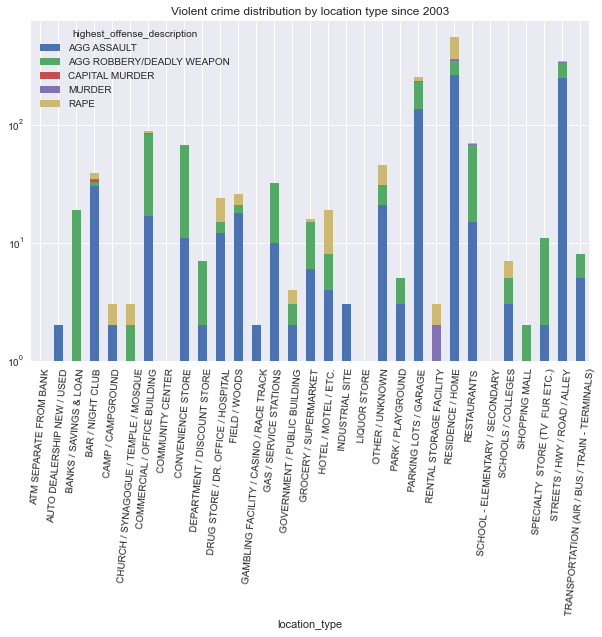

----------------------------------------------------------
----------------------------------------------------------


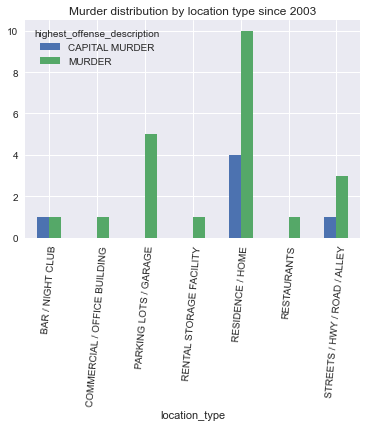

In [9]:
# Showing violent crime and murder rates by location type
viol_loc = pd.crosstab(df_viol.location_type, df_viol.highest_offense_description)
display(viol_loc)

print("----------------------------------------------------------")
print("----------------------------------------------------------")

mur_loc = pd.crosstab(
    df_viol_mur.location_type, df_viol_mur.highest_offense_description
)

viol_loc.plot.bar(
    stacked=True,
    figsize=(10, 6.25),
    logy=True,
    rot=85,
    title="Violent crime distribution by location type since 2003",
)
plt.show()

print("----------------------------------------------------------")
print("----------------------------------------------------------")

mur_loc.plot.bar(rot=85, title="Murder distribution by location type since 2003")
plt.show()

INFO:fbprophet:Found custom seasonality named 'weekly', disabling built-in 'weekly' seasonality.
INFO:fbprophet:Found custom seasonality named 'daily', disabling built-in 'daily' seasonality.


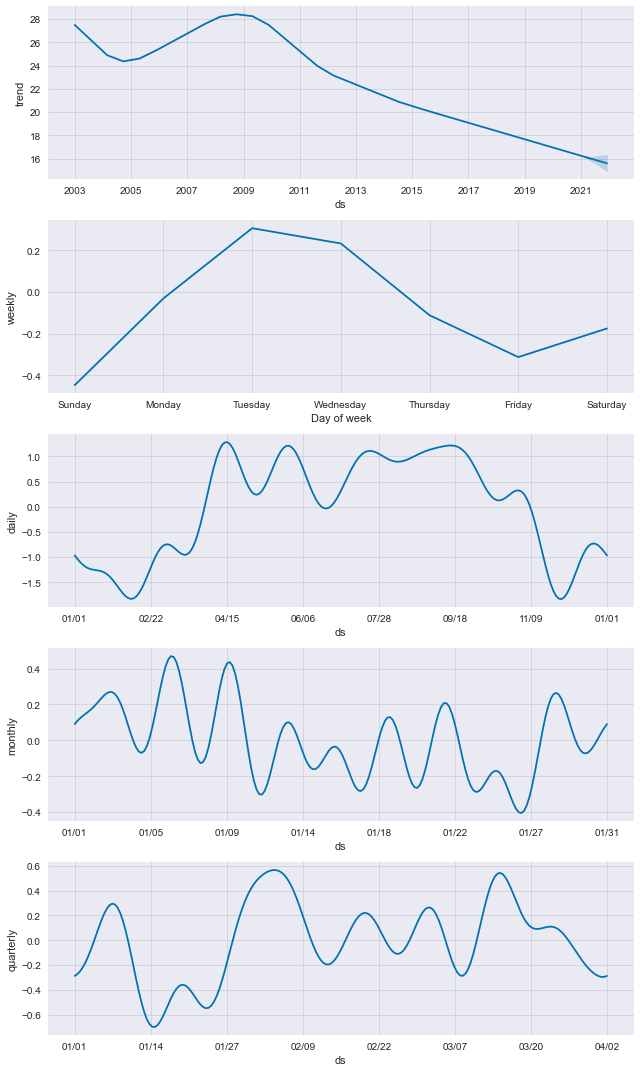

In [10]:
df_fbprophet = df

df_m = df_fbprophet.resample("D").size().reset_index()
df_m.columns = ["date", "daily_crime_count"]
df_m_final = df_m.rename(columns={"date": "ds", "daily_crime_count": "y"})

m = Prophet(interval_width=0.95, yearly_seasonality=False)
m.add_seasonality(name="monthly", period=30.5, fourier_order=10)
m.add_seasonality(name="quarterly", period=91.5, fourier_order=10)
m.add_seasonality(name="weekly", period=52, fourier_order=10)
m.add_seasonality(name="daily", period=365, fourier_order=10)
m.fit(df_m_final)

future = m.make_future_dataframe(periods=365, freq="D")
pred = m.predict(future)

fig2 = m.plot_components(pred)
fig2_1 = plot_plotly(m, pred)
fig2_1

INFO:fbprophet:Found custom seasonality named 'weekly', disabling built-in 'weekly' seasonality.
INFO:fbprophet:Found custom seasonality named 'daily', disabling built-in 'daily' seasonality.


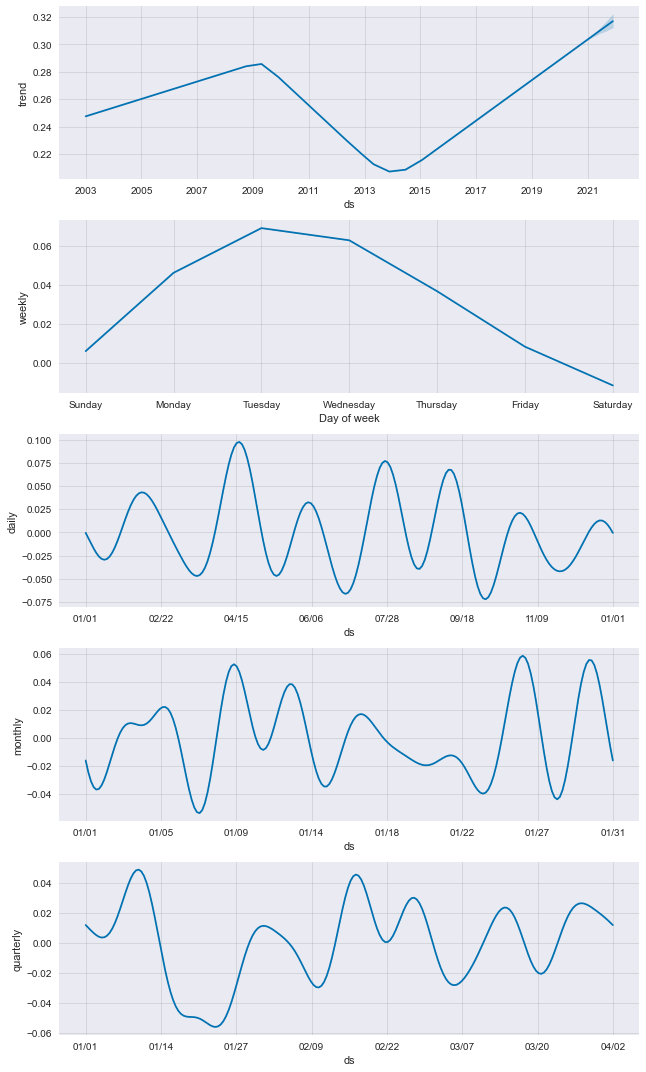

In [11]:
df_viol_fbprophet = df_viol

df_viol_n = df_viol_fbprophet.resample("D").size().reset_index()
df_viol_n.columns = ["date", "daily_crime_count"]
df_viol_n_final = df_viol_n.rename(columns={"date": "ds", "daily_crime_count": "y"})

n = Prophet(interval_width=0.95, yearly_seasonality=False)
n.add_seasonality(name="monthly", period=30.5, fourier_order=10)
n.add_seasonality(name="quarterly", period=91.5, fourier_order=10)
n.add_seasonality(name="weekly", period=52, fourier_order=10)
n.add_seasonality(name="daily", period=365, fourier_order=10)
n.fit(df_viol_n_final)

future = n.make_future_dataframe(periods=365, freq="D")
pred = n.predict(future)

fig3 = n.plot_components(pred)
fig3_1 = plot_plotly(n, pred)
fig3_1